In [1]:
df = read.csv("./Walmart_Sales_Updated.csv")

In [2]:
#Conferir se já não foi alterado e converter coluna 'Date pata formato Date
if ( class(df$Date) != "Date" ) {
  df$Date = as.Date(df$Date, format = "%Y-%m-%d")
}


In [3]:
head(df)

,X,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_CPI
,<int>,<int>,<date>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,2010-02-05,1643691,0,42.31,2.572,211.0964,8.106,NA
2,2,1,2010-02-12,1641957,1,38.51,2.548,211.2422,8.106,0.06907348
3,3,1,2010-02-19,1611968,0,39.93,2.514,211.2891,8.106,0.02223661
4,4,1,2010-02-26,1409728,0,46.63,2.561,211.3196,8.106,0.01443520
5,5,1,2010-03-05,1554807,0,46.50,2.625,211.3501,8.106,0.01443311
6,6,1,2010-03-12,1439542,0,57.79,2.667,211.3806,8.106,0.01443103


Estudando o efeito de feriados

In [4]:
nstore = 0
if (nstore > 0){
    dfplot = df[(df$Store == nstore),]
} else {
    dfplot = df
}
weeks_pre = 3
weeks_post = 2

condition = dfplot$Holiday_Flag == 1
holiday_dates = dfplot$Date[which(condition)]
nholidays = length(holiday_dates)



##Pre Holiday
dfplot$Pre_Holiday = 0
for (i in 1:nholidays){
    
    match_date = dfplot$Date[which(condition)[i]]

    dfplot$Pre_Holiday = ifelse(dfplot$Date <= match_date & dfplot$Date >= (match_date - weeks_pre*7),1,dfplot$Pre_Holiday)
    
    }

#Post Holiday
dfplot$Post_Holiday = 0
for (i in 1:nholidays){
    
    match_date = dfplot$Date[which(condition)[i]]

    dfplot$Post_Holiday = ifelse(dfplot$Date > match_date & dfplot$Date <= (match_date + weeks_post*7),1,dfplot$Post_Holiday)
    
    }

Estudar semanas no entorno dos feriados. Cuidado no caso Thanks Giving / Natal, com pré e pós se sobrepondo.

Criar boxplot com três grupos, pre (boom), pós (bust) e indiferente (neutral).

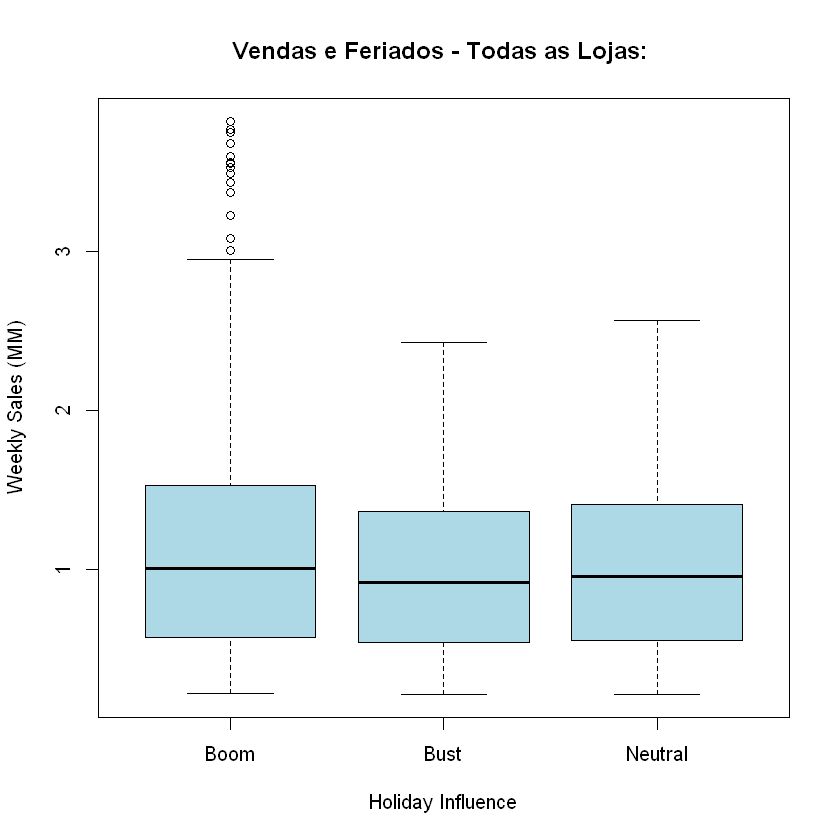

In [5]:
dfplot$Holiday_Effect = 'Neutral'

dfplot$Holiday_Effect = ifelse(dfplot$Post_Holiday == 1,'Bust', dfplot$Holiday_Effect)
dfplot$Holiday_Effect = ifelse(dfplot$Pre_Holiday == 1,'Boom', dfplot$Holiday_Effect)

if (nstore > 0){
    texto_main = paste( 'Vendas e Feriados - Loja: ', nstore)
    } else {
    texto_main = 'Vendas e Feriados - Todas as Lojas: '
    }

bp = boxplot(Weekly_Sales/1000000 ~ Holiday_Effect, 
        data = dfplot,
        ylab = 'Weekly Sales (MM)',
        xlab = 'Holiday Influence',
        col = 'light blue',
        main = texto_main
       )


Fica clara a influência da aproximação do feriado no aumento de vandas e depois a ressaca de vendas depois do feriado.